In [2]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PSF, DCD
from MDAnalysis.analysis.dihedrals import Ramachandran
import matplotlib.pyplot as plt
import numpy as np
import nglview as nv

In [3]:
# Load the universe with structure and trajectory files
u = mda.Universe(PSF, DCD)

# Print basic information about the system
print(u)
print(f"Number of atoms: {len(u.atoms)}")
print(f"Number of frames: {len(u.trajectory)}")

<Universe with 3341 atoms>
Number of atoms: 3341
Number of frames: 98


/Users/garyshincc/garyshin/cpbio_env/lib/python3.11/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [5]:
# Select the backbone atoms
backbone = u.select_atoms("backbone")

# Print details of the selection
print(backbone)

<AtomGroup [<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>, <Atom 5: CA of type 22 of resname MET, resid 1 and segid 4AKE>, <Atom 18: C of type 20 of resname MET, resid 1 and segid 4AKE>, ..., <Atom 3334: N of type 54 of resname GLY, resid 214 and segid 4AKE>, <Atom 3336: CA of type 23 of resname GLY, resid 214 and segid 4AKE>, <Atom 3339: C of type 32 of resname GLY, resid 214 and segid 4AKE>]>


In [7]:

view = nv.show_mdanalysis(u)
view

NGLWidget(max_frame=97)

/Users/garyshincc/garyshin/cpbio_env/lib/python3.11/site-packages/MDAnalysis/analysis/dihedrals.py:418: UserWarning: Cannot determine phi and psi angles for the first or last residues
  warnings.warn("Cannot determine phi and psi angles for the first "
/Users/garyshincc/garyshin/cpbio_env/lib/python3.11/site-packages/MDAnalysis/analysis/dihedrals.py:527: DeprecationWarning: The `angle` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.angles` instead
  warnings.warn(wmsg, DeprecationWarning)


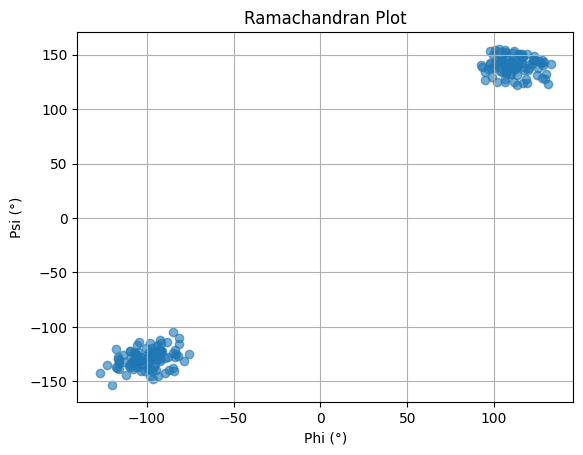

In [8]:


# Run Ramachandran analysis for phi/psi angles
ramachandran = Ramachandran(u.select_atoms("protein")).run()

# Extract phi/psi angles
phi_psi = ramachandran.angles

# Plot the Ramachandran plot
phi, psi = phi_psi[:, 0], phi_psi[:, 1]
plt.scatter(phi, psi, alpha=0.6)
plt.xlabel("Phi (°)")
plt.ylabel("Psi (°)")
plt.title("Ramachandran Plot")
plt.grid(True)
plt.show()
